# 1. Descargar Librerías

In [1]:
##IMPORTAR LIBRERÍAS
#Advertencias
import warnings
warnings.filterwarnings('ignore')

#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Procesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Evaluación
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# 2. Seleccionar el Dataframe a intervenir

En este paso, la idea es poder descargar la base de datos de interés; para este caso en particular, la crearemos in situ.

In [21]:
#Identificar la cantidad de carreras en un partido de baseball a partir de la cantidad de bateos efectivos

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})

In [22]:
datos.to_csv(r'"C:\Users\Simon\Downloads\export_dataframe.csv', index=False, header=True)

# 3. EDA

In [3]:
datos.head()

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   equipos  30 non-null     object
 1   bateos   30 non-null     int64 
 2   runs     30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [7]:
datos.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


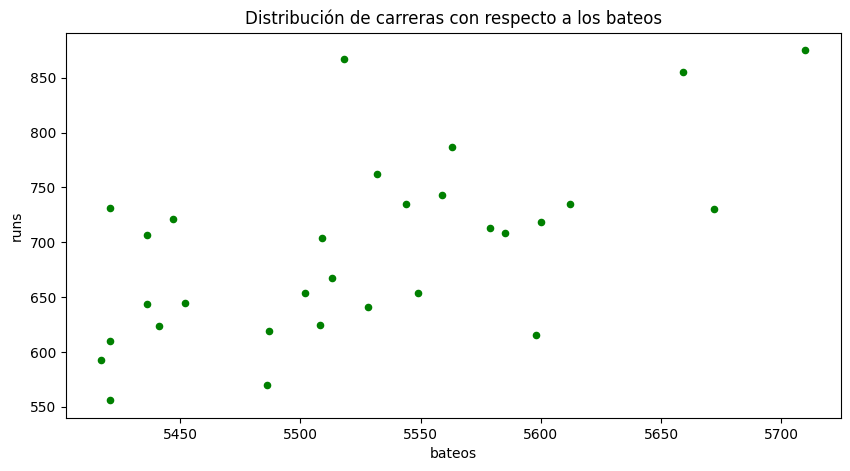

In [4]:
fig, ax = plt.subplots(figsize = (10,5))
datos.plot(x = 'bateos',
          y = 'runs',
          c = 'green',
          kind = 'scatter',
          ax = ax)
ax.set_title('Distribución de carreras con respecto a los bateos')
plt.show()

# 4. Preparación de los datos

Para que el modelo de ML funcione, debemos de separar los conjuntos de datos en 2, uno de entrenamiento (con la mayoría de la información) y el otro de prueba.

In [9]:
X = datos[['bateos']]
y = datos['runs']
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(X, y, train_size = 0.7, random_state = 123)

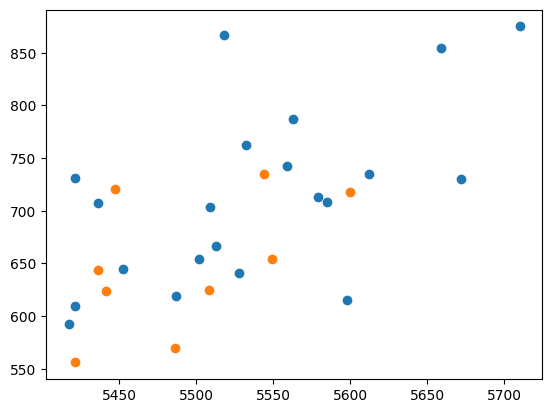

In [10]:
plt.scatter(xEntrenamiento, yEntrenamiento)
plt.scatter(xPrueba, yPrueba)
plt.show()

# 5. Modelado

Para este caso, utilizaremos la regresión lineal de la biblioteca de SKLearn.

In [11]:
modelo = LinearRegression()
modelo

LinearRegression()

In [12]:
modelo.fit(xEntrenamiento, yEntrenamiento)

LinearRegression()

In [13]:
#Parámetros del modelo
print('Intercepto: ', modelo.intercept_)
print('Coeficientes: ', list(zip(X.columns, modelo.coef_.flatten())))

Intercepto:  -2483.313302075286
Coeficientes:  [('bateos', 0.5771811112088018)]


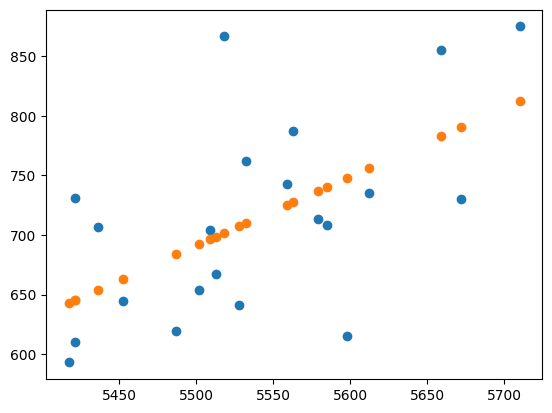

In [14]:
predEntrenamiento = modelo.predict(xEntrenamiento)
plt.scatter(xEntrenamiento, yEntrenamiento)
plt.scatter(xEntrenamiento, predEntrenamiento)

In [15]:
r2Entrenamiento = r2_score(yEntrenamiento, predEntrenamiento)
rmseEntrenamiento = mean_squared_error(yEntrenamiento, predEntrenamiento, squared = False)
maeEntrenamiento = mean_absolute_error(yEntrenamiento, predEntrenamiento)
mapeEntrenamiento = mean_absolute_percentage_error(yEntrenamiento, predEntrenamiento)

In [16]:
print('R2 de entrenamiento: ', r2Entrenamiento)
print('RMSE de entrenamiento: ', rmseEntrenamiento)
print('MAE de entrenamiento: ', maeEntrenamiento)
print('MAPE de entrenamiento: ', mapeEntrenamiento)

R2 de entrenamiento:  0.3401228248215342
RMSE de entrenamiento:  66.08596249427792
MAE de entrenamiento:  54.80400015046713
MAPE de entrenamiento:  0.07661185762577276


In [17]:
predPrueba = modelo.predict(xPrueba)
r2Prueba = r2_score(yPrueba, predPrueba)
rmsePrueba = mean_squared_error(yPrueba, predPrueba, squared = False)
maePrueba = mean_absolute_error(yPrueba, predPrueba)
mapePrueba = mean_absolute_percentage_error(yPrueba, predPrueba)

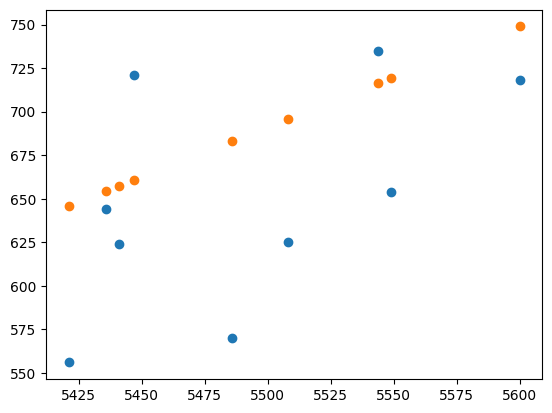

In [18]:
plt.scatter(xPrueba, yPrueba)
plt.scatter(xPrueba, predPrueba)

In [ ]:
print('R2 de prueba: ', r2Prueba)
print('RMSE de prueba: ', rmsePrueba)
print('MAE de prueba: ', maePrueba)
print('MAPE de prueba: ', mapePrueba)

R2 de prueba:  -0.08315191068814443
RMSE de prueba:  63.47506917944477
MAE de prueba:  54.67277692279751
MAPE de prueba:  0.08820113886824628
